Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SL                     36000 non-null  int64  
 1   Emotion                36000 non-null  object 
 2   Text                   36000 non-null  object 
 3   Year                   36000 non-null  int64  
 4   Racial Biases          0 non-null      float64
 5   Hatred Percentage      0 non-null      float64
 6   Depression Percentage  0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.9+ MB
None

First 5 rows:
   SL  Emotion                                               Text  Year  \
0   1  disgust  নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...  2016   
1   2  disgust  জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...  2016   
2   3    angry                                   ভেজাল নির্বাচন ।  2016   
3   4    happy  বিএনপি ও রাজ

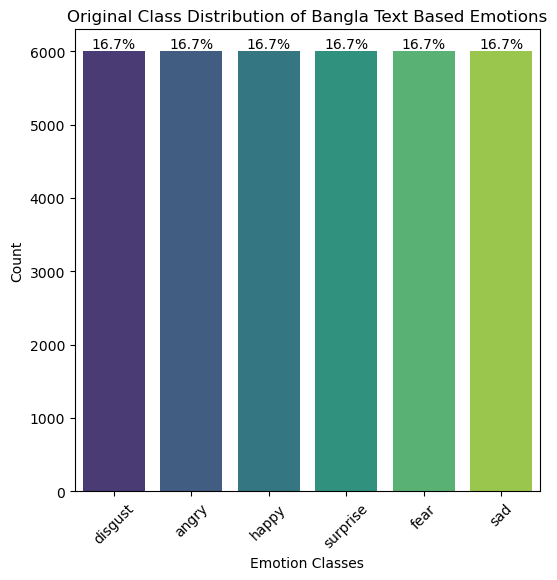


Class Distribution Table (Downsampled):
Emotion
angry       1000
disgust     1000
fear        1000
happy       1000
sad         1000
surprise    1000
Name: count, dtype: int64


C:\Users\Tazbin\AppData\Local\Temp\ipykernel_8956\2683762369.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df.groupby('Emotion').apply(lambda x: x.sample(n=min_class_samples, random_state=42)).reset_index(drop=True)


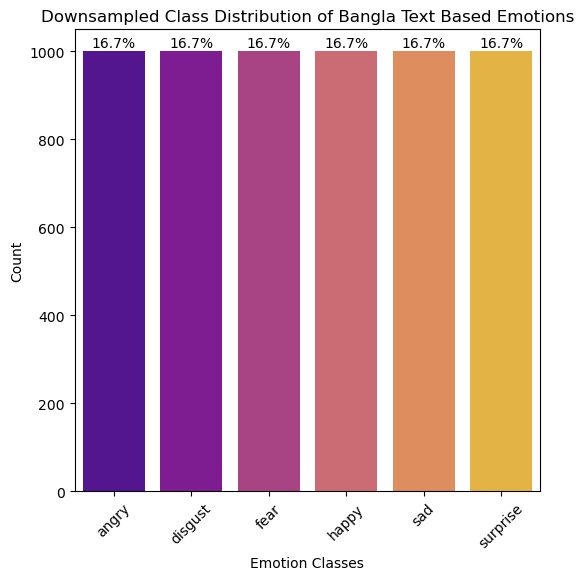

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
text_data_path = 'F:/MS Thesis/MultiModel/Text.csv'
df = pd.read_csv(text_data_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Plot original class distribution with percentages
if 'Emotion' in df.columns:
    # Display value counts as a table for the original dataset
    original_class_counts = df['Emotion'].value_counts()
    print("\nClass Distribution Table (Original):")
    print(original_class_counts)

    # Plot the distribution
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(x='Emotion', data=df, palette='viridis')
    plt.title('Original Class Distribution of Bangla Text Based Emotions')
    plt.xlabel('Emotion Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add percentages on top of bars
    total = len(df)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%"
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + 2,
            percentage,
            ha='center',
            va='bottom',
            fontsize=10
        )
    plt.show()
else:
    print("Column 'Emotion' not found in the dataset. Please check the column names.")

# Downsample the dataset to have exactly 1000 samples per class
min_class_samples = 1000
df_resampled = df.groupby('Emotion').apply(lambda x: x.sample(n=min_class_samples, random_state=42)).reset_index(drop=True)

# Plot downsampled class distribution with percentages
if 'Emotion' in df_resampled.columns:
    # Display value counts as a table for the downsampled dataset
    downsampled_class_counts = df_resampled['Emotion'].value_counts()
    print("\nClass Distribution Table (Downsampled):")
    print(downsampled_class_counts)

    # Plot the distribution
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(x='Emotion', data=df_resampled, palette='plasma')
    plt.title('Downsampled Class Distribution of Bangla Text Based Emotions')
    plt.xlabel('Emotion Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add percentages on top of bars
    total = len(df_resampled)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%"
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + 2,
            percentage,
            ha='center',
            va='bottom',
            fontsize=10
        )
    plt.show()
else:
    print("Column 'Emotion' not found in the dataset. Please check the column names.")

# Save the downsampled file
save_path = 'F:/MS Thesis/RND/Text_downsampled.csv'
df_resampled.to_csv(save_path, index=False)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

# Example list of Bangla stopwords (expand as needed)
bangla_stopwords = set([
    "এবং", "কিন্তু", "যদি", "তবে", "বা", "এই", "সে", "তার", "তাদের", "অথবা", 
    "কী", "হতে", "কেন", "কিছু", "আপনি", "আমি", "আমরা", "তোমরা", "এটা", "তারপর"
])

# Load the dataset
text_data_path = 'F:/MS Thesis/RND/Text_downsampled.csv'
df = pd.read_csv(text_data_path)

# Text Preprocessing (remove non-Bengali characters, tokenization, stopwords removal)
def preprocess_text(text):
    # Remove non-Bengali characters and unnecessary symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    # Tokenize text and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in bangla_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Label Encoding for target variable
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Save class name mapping for reference
class_mapping = pd.DataFrame({
    'Class_Name': label_encoder.classes_,
    'Encoded_Label': range(len(label_encoder.classes_))
})
class_mapping_path = 'F:/MS Thesis/RND/ClassMapping.csv'
class_mapping.to_csv(class_mapping_path, index=False, encoding='utf-8-sig')

# Save the preprocessed data to a CSV file
output_path = 'F:/MS Thesis/RND/BanglaText.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Preprocessed data saved to {output_path}")
print(f"Class mapping saved to {class_mapping_path}")


Preprocessed data saved to F:/MS Thesis/RND/BanglaText.csv
Class mapping saved to F:/MS Thesis/RND/ClassMapping.csv


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Example list of Bangla stopwords (expand as needed)
bangla_stopwords = set([
    "এবং", "কিন্তু", "যদি", "তবে", "বা", "এই", "সে", "তার", "তাদের", "অথবা", 
    "কী", "হতে", "কেন", "কিছু", "আপনি", "আমি", "আমরা", "তোমরা", "এটা", "তারপর"
])

# Normalize stopwords
def normalize_stopwords(stopwords):
    return [re.sub(r'[^\u0980-\u09FF\s]', '', word).strip() for word in stopwords]

normalized_stopwords = normalize_stopwords(bangla_stopwords)

# Initialize TF-IDF Vectorizer with normalized stopwords
vectorizer = TfidfVectorizer(
    max_features=5000, 
    stop_words=normalized_stopwords
)

# Fit and transform the preprocessed text data
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Labels
y = df['Encoded_Emotion']

# Save vectorized features and labels
np.save('F:/MS Thesis/RND/X_tfidf.npy', X.toarray())
np.save('F:/MS Thesis/RND/y_labels.npy', y)

print("TF-IDF features and labels saved successfully.")


E:\python\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'আপন', 'আম', 'আমর', 'এট', 'এব', 'তব', 'মর', 'যদ', 'রপর', 'হত'] not in stop_words.
  warnings.warn(


TF-IDF features and labels saved successfully.


Data split into train, validation, and test sets.
SVM - Test Accuracy: 0.46
              precision    recall  f1-score   support

       angry       0.36      0.35      0.36       100
     disgust       0.52      0.53      0.52       100
        fear       0.53      0.57      0.55       100
       happy       0.51      0.47      0.49       100
         sad       0.34      0.29      0.31       100
    surprise       0.47      0.54      0.50       100

    accuracy                           0.46       600
   macro avg       0.45      0.46      0.46       600
weighted avg       0.45      0.46      0.46       600



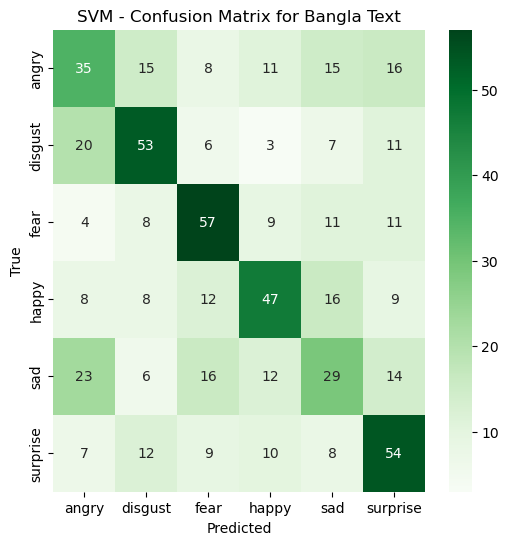

Naive Bayes - Test Accuracy: 0.42
              precision    recall  f1-score   support

       angry       0.34      0.38      0.36       100
     disgust       0.43      0.48      0.45       100
        fear       0.45      0.54      0.49       100
       happy       0.52      0.45      0.48       100
         sad       0.32      0.29      0.31       100
    surprise       0.47      0.38      0.42       100

    accuracy                           0.42       600
   macro avg       0.42      0.42      0.42       600
weighted avg       0.42      0.42      0.42       600



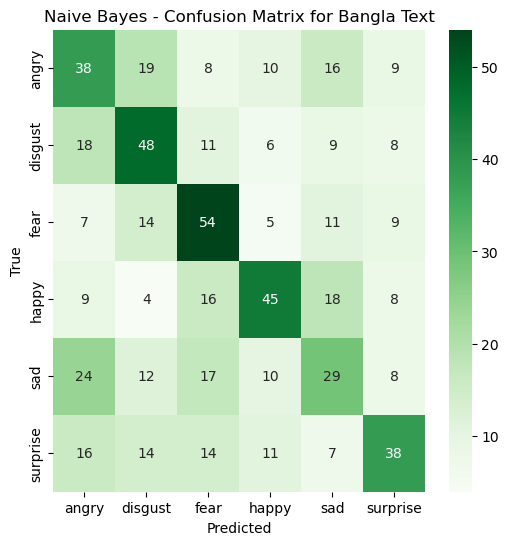

Random Forest - Test Accuracy: 0.59
              precision    recall  f1-score   support

       angry       0.50      0.52      0.51       100
     disgust       0.77      0.59      0.67       100
        fear       0.73      0.73      0.73       100
       happy       0.53      0.51      0.52       100
         sad       0.46      0.51      0.48       100
    surprise       0.61      0.68      0.64       100

    accuracy                           0.59       600
   macro avg       0.60      0.59      0.59       600
weighted avg       0.60      0.59      0.59       600



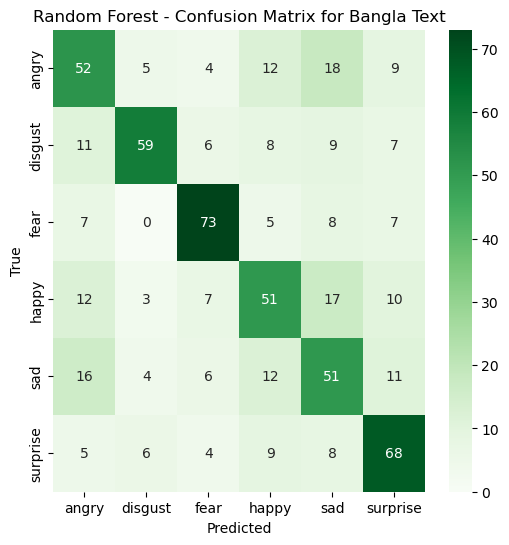

E:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Test Accuracy: 0.53
              precision    recall  f1-score   support

       angry       0.47      0.42      0.44       100
     disgust       0.62      0.57      0.59       100
        fear       0.65      0.64      0.64       100
       happy       0.59      0.46      0.52       100
         sad       0.42      0.42      0.42       100
    surprise       0.48      0.68      0.56       100

    accuracy                           0.53       600
   macro avg       0.54      0.53      0.53       600
weighted avg       0.54      0.53      0.53       600



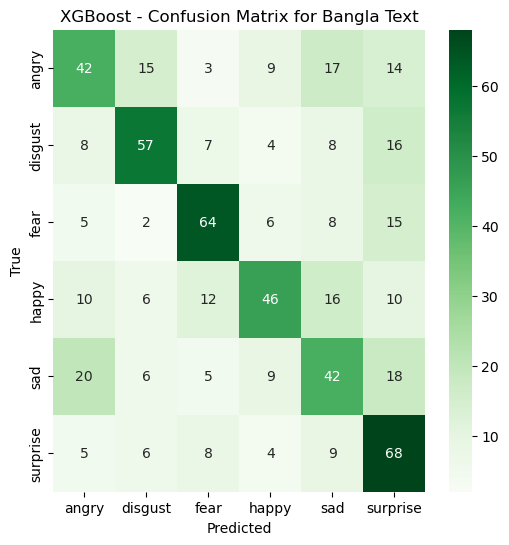

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the saved features and labels
X = np.load('F:/MS Thesis/RND/X_tfidf.npy')
y = np.load('F:/MS Thesis/RND/y_labels.npy', allow_pickle=True)

# Load the label encoder from the previously saved mapping
class_mapping = pd.read_csv('F:/MS Thesis/RND/ClassMapping.csv', encoding='utf-8-sig')
label_encoder = LabelEncoder()
label_encoder.classes_ = class_mapping['Class_Name'].values  # Manually setting the class names

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Data split into train, validation, and test sets.")

# Initialize models
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=80, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train, Evaluate, and Visualize Results
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy and classification report
    print(f"{name} - Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    
    # Convert numeric predictions back to class names
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)
    
    # Pass the actual class names into the classification report
    print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix for Bangla Text')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
